In [1]:
import numpy as np
import os
import PIL
import sys
from monai.networks.nets import UNETR
import matplotlib.pyplot as plt
import torch.cuda as cuda
sys.path.append("../Utils")
from utils import get_padded_loaders

In [2]:
path_train = "../../Data/dataset_DRIVE/training/images/"
training_images = os.listdir(path_train)

In [3]:
train_images = {}
for i in sorted(training_images):
    number = i[0:2]
    img = np.array(PIL.Image.open(f'{path_train}{i}').convert("RGB"))
    train_images[str(number)] =  img

In [4]:
train_images['21'].shape

(584, 565, 3)

In [5]:
DEVICE = "cuda" if cuda.is_available() else "cpu"


kwargs = {'train_dir': '../../Data/dataset_DRIVE/training/images',
          'train_maskdir': '../../Data/dataset_DRIVE/training/1st_manual',
          'val_dir': '../../Data/dataset_DRIVE/validation/images',
          'val_maskdir': '../../Data/dataset_DRIVE/validation/1st_manual',
          'batch_size': 1,
          'rotation': [-45, 45],
          'hflip_prob': 0.3,
          'brightness': [0.5, 1.5],
          'contrast': [0.5, 1.5],
          'gamma': [0.7, 1.3],
          'affine_prob': 0.4,
          'affine_translate': [0.05, 0.1],  # Horiz and vert translation
          'affine_scale': [1, 1.3],
          'affine_shears': [0, 0],
          'noise': (0, 0.2),  # (Mean,std)
          'num_workers': 0,
          'pin_memory': True}

In [6]:
train_loader, val_loader = get_padded_loaders(**kwargs)

In [7]:
image = next(iter(train_loader))[0]

In [8]:
image.shape

torch.Size([1, 3, 584, 584])

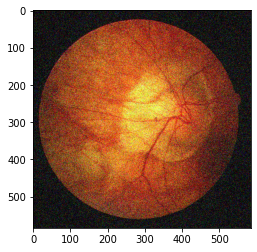

In [9]:
plt.imshow(image.squeeze(0).permute(1, 2, 0))

In [10]:
model = UNETR(in_channels=3, out_channels=1, img_size=584, spatial_dims=2, feature_size=73)

In [11]:
model.forward(image)

RuntimeError: Sizes of tensors must match except in dimension 1. Expected size 576 but got size 584 for tensor number 1 in the list.